# Import libraries and load data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('/mnt/data/OBF/02_intermediate/preprocessed_oss_counter_all_v3.csv',delimiter ='|')
data = data.sort_values(by=['week_period'])

# Data Analyse
## Sampling

In [4]:
data.sample(n=5)

,cell_id,cell_name,date,cell_band,cell_tech,cell_sector,year,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week
465345,20463,DIBIEN3,202102,G900,2G,S3,2021,202102,HB0046,0.497677,0.036778,0.000000,0.000000,0.000000,43.370390,26.986965,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.0,2
289370,11095,WBF1095,202107,U2100,3G,S2,2021,202107,BF0109,131.013988,0.107176,0.000000,0.000000,NaN,2244.948349,196.225822,3.734432,3.734273,NaN,NaN,0.000000,NaN,NaN,0.0,7
5422,1,LBF4641,202115,L800,4G,S1,2021,202115,BF0464,157.074922,0.000000,21.048659,0.000000,NaN,10325.929880,6057.233697,11.615113,NaN,15.981465,2.271795,0.225598,NaN,NaN,0.0,15
311585,12635,WBF2635,202131,U2100,3G,S2,2021,202131,BF0263,37.150007,0.125301,0.000000,0.000000,NaN,0.000000,201.878052,2.009284,2.009053,NaN,NaN,0.417032,NaN,NaN,0.0,31
155703,2192,DIDYRG2,202116,G900,2G,S2,2021,202116,BF0219,7.465140,2.103006,0.000000,0.001182,0.000562,41.771684,33.693321,NaN,NaN,8.604931,NaN,NaN,85.125125,8.620599,21399.0,16


## Number of records per date

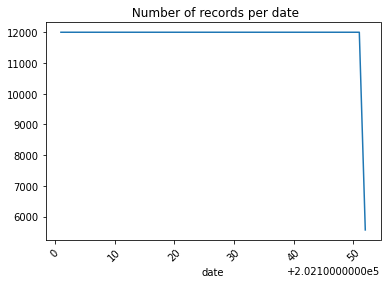

In [13]:
data.groupby('date').size().plot()
plt.xticks(rotation=45)
plt.title(' Number of records per date')
plt.show()

### Zoom in

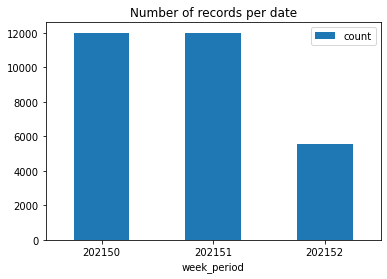

In [15]:
critical_periods_counts =[(202150 + a, len(data[data['week_period'] == 202150+a])) for a in range (3)]
critical = pd.DataFrame(critical_periods_counts, columns=['week_period','count'])
critical.plot(kind='bar',x='week_period')
plt.xticks(rotation=0)
plt.title('Number of records per date')
plt.show()

### Duplicated records by cell_name

In [17]:
duplicated = data[data.duplicated(subset=['cell_name','date'],keep=False)]\
            .sort_values(by=['date','cell_name'])
duplicated

,cell_id,cell_name,date,cell_band,cell_tech,cell_sector,year,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week
488614,31081,WCE008D,202101,U900,3G,S1,2021,202101,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,1
478051,30081,WCE008D,202101,U900,3G,S1,2021,202101,CE0008,71.796554,0.326061,0.0,0.0,NaN,254.093738,105.867952,8.570412,8.566080,NaN,NaN,3.652878,NaN,NaN,0.0,1
488665,31082,WCE008E,202101,U900,3G,S2,2021,202101,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,1
478102,30082,WCE008E,202101,U900,3G,S2,2021,202101,CE0008,55.957515,0.207028,0.0,0.0,NaN,903.693652,171.822537,2.465253,2.465038,NaN,NaN,0.813968,NaN,NaN,0.0,1
488716,31083,WCE008F,202101,U900,3G,S3,2021,202101,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488664,31081,WCE008D,202151,U900,3G,S1,2021,202151,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,51
478152,30082,WCE008E,202151,U900,3G,S2,2021,202151,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,51
488715,31082,WCE008E,202151,U900,3G,S2,2021,202151,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,51
478203,30083,WCE008F,202151,U900,3G,S3,2021,202151,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,51


In [5]:
batch = data[(data.date == 202101)]
duplicated = batch[batch.duplicated(subset=['cell_name','date'],keep=False)]\
            .sort_values(by=['date','cell_name'])
duplicated

,cell_id,cell_name,date,cell_band,cell_tech,cell_sector,year,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week
488614,31081,WCE008D,202101,U900,3G,S1,2021,202101,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,1
478051,30081,WCE008D,202101,U900,3G,S1,2021,202101,CE0008,71.796554,0.326061,0.0,0.0,NaN,254.093738,105.867952,8.570412,8.566080,NaN,NaN,3.652878,NaN,NaN,0.0,1
488665,31082,WCE008E,202101,U900,3G,S2,2021,202101,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,1
478102,30082,WCE008E,202101,U900,3G,S2,2021,202101,CE0008,55.957515,0.207028,0.0,0.0,NaN,903.693652,171.822537,2.465253,2.465038,NaN,NaN,0.813968,NaN,NaN,0.0,1
488716,31083,WCE008F,202101,U900,3G,S3,2021,202101,CE0008,0.000000,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,1
478153,30083,WCE008F,202101,U900,3G,S3,2021,202101,CE0008,66.767581,0.272799,0.0,0.0,NaN,734.306630,158.801507,3.873942,3.873636,NaN,NaN,1.195702,NaN,NaN,0.0,1


### Duplicated records by cell_id

In [18]:
duplicated = data[data.duplicated(subset=['cell_id','date'],keep=False)]\
            .sort_values(by=['date','cell_id'])
duplicated

,cell_id,cell_name,date,cell_band,cell_tech,cell_sector,year,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week
0,1,LBF0001,202101,L800,4G,S1,2021,202101,BF0000,17.229338,0.0,1.815033,0.0,NaN,2562.035952,134.358669,27.292466,NaN,26.800699,8.913620,1.073244,NaN,NaN,0.0,1
17628,1,LCC9871,202101,L800,4G,S1,2021,202101,BF0987,0.000000,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.0,1
17524,1,LCC9741,202101,L800,4G,S1,2021,202101,BF0974,0.000000,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.0,1
17576,1,LCC9801,202101,L800,4G,S1,2021,202101,BF0980,0.000000,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.0,1
17784,1,LCO3711,202101,L800,4G,S1,2021,202101,BF0371,0.000000,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105715,6,LBF2266,202152,L1800,4G,S3,2021,202152,BF0226,638.045337,0.0,83.224157,0.0,NaN,3910.114813,2449.075683,114.675637,NaN,64.436781,9.731575,3.514596,NaN,NaN,0.0,52
106027,6,LBF2556,202152,L1800,4G,S3,2021,202152,BF0255,307.521820,0.0,27.728161,0.0,NaN,3574.520222,187.818137,67.627222,NaN,33.995209,6.736167,1.967759,NaN,NaN,0.0,52
106079,6,LBF2566,202152,L1800,4G,S3,2021,202152,BF0256,337.861063,0.0,38.262550,0.0,NaN,6571.762894,1173.661488,65.421285,NaN,42.597752,7.004592,1.170748,NaN,NaN,0.0,52
105923,6,LBF2536,202152,L1800,4G,S3,2021,202152,BF0253,249.697558,0.0,26.441907,0.0,NaN,4303.899114,763.094174,33.384074,NaN,38.845541,4.498787,1.188140,NaN,NaN,0.0,52


In [6]:
batch = data[(data.date == 202101)]
duplicated = batch[batch.duplicated(subset=['cell_id','date'],keep=False)]\
            .sort_values(by=['date','cell_id'])
duplicated

,cell_id,cell_name,date,cell_band,cell_tech,cell_sector,year,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week
0,1,LBF0001,202101,L800,4G,S1,2021,202101,BF0000,17.229338,0.000000,1.815033,0.0,NaN,2562.035952,134.358669,27.292466,NaN,26.800699,8.91362,1.073244,NaN,NaN,0.0,1
17628,1,LCC9871,202101,L800,4G,S1,2021,202101,BF0987,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,NaN,NaN,0.0,1
17524,1,LCC9741,202101,L800,4G,S1,2021,202101,BF0974,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,NaN,NaN,0.0,1
17576,1,LCC9801,202101,L800,4G,S1,2021,202101,BF0980,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,NaN,NaN,0.0,1
17784,1,LCO3711,202101,L800,4G,S1,2021,202101,BF0371,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,NaN,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573988,40011,MANGFV1,202101,G900,2G,S1,2021,202101,CS0001,1.085429,0.368333,0.000000,0.0,0.0,47.718932,50.941378,NaN,NaN,0.000000,NaN,NaN,46.044495,0.0,0.0,1
574143,40012,WCS001E,202101,U900,3G,S2,2021,202101,CS0001,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,1
574091,40012,MANGFV2,202101,G900,2G,S2,2021,202101,CS0001,0.811684,0.366244,0.000000,0.0,0.0,50.031392,47.342490,NaN,NaN,0.000000,NaN,NaN,72.131545,0.0,0.0,1
574246,40013,WCS001F,202101,U900,3G,S3,2021,202101,CS0001,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,0.000000,NaN,NaN,0.0,1


### Duplicated records by cell_id & cell_name

In [21]:
duplicated = data[data.duplicated(subset=['cell_id','cell_name','date'],keep=False)]\
            .sort_values(by=['date','cell_id','cell_name'])
duplicated

,cell_id,cell_name,date,cell_band,cell_tech,cell_sector,year,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week


## Number of row per sector through time 

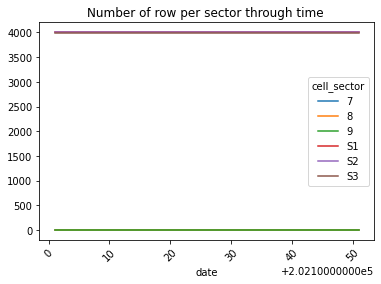

In [31]:
sectors = data.groupby(['date','cell_sector']).size().unstack()[:-1]
sectors.plot()
plt.xticks(rotation=45)
plt.title('Number of row per sector through time ')
plt.show()

There is nothing suspicious in the figure. 
## Number of new/ removed cells per date

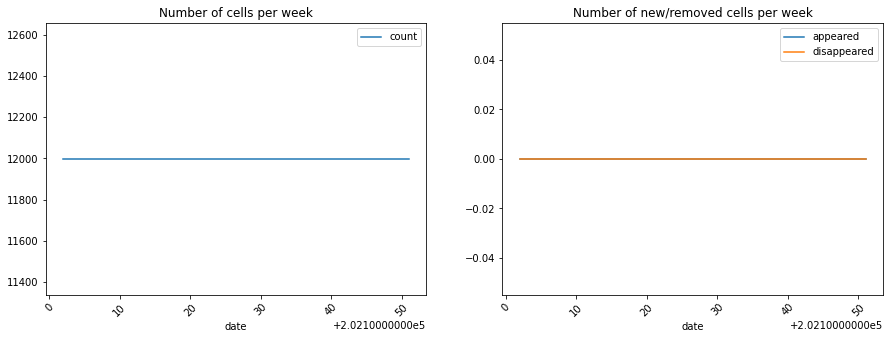

In [16]:
cells_list = data.groupby(['date']).cell_name.apply(set)
prev = cells_list[202101]
appeared = []
disappeared = []
count=[]
# remove 0 because it does not have a previous and -1 because we do not have enough data
for date,cells in cells_list[1:-1].items():
    appeared += [len(list(cells-prev))]
    disappeared += [len(list(prev-cells))]
    count += [len(cells) ]
    prev = cells
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].set_title('Number of cells per week')
axs[1].set_title('Number of new/removed cells per week')
pd.DataFrame({'count':count},cells_list[1:-1].keys()).plot(ax=axs[0])
pd.DataFrame({'appeared':appeared,'disappeared':disappeared},cells_list[1:-1].keys()).plot(ax=axs[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

The business team might be intersted in taking a look. The orange peak around 202104 look suspicious. 

## Number of new/ removed sites per date

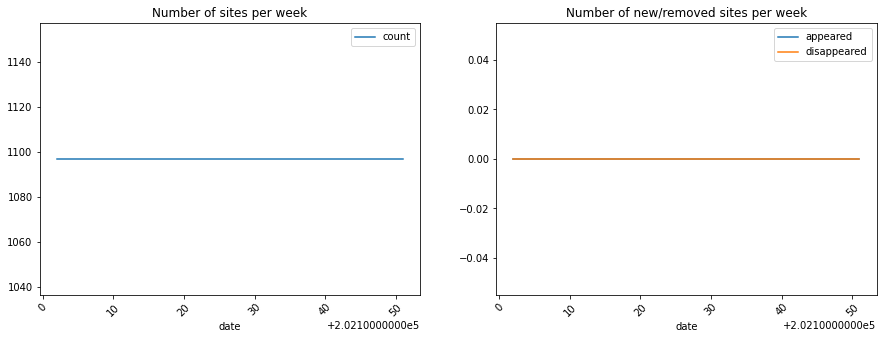

In [34]:
cells_list = data.groupby(['date']).site_id.apply(set)
prev = cells_list[202101]
appeared = []
disappeared = []
count=[]
# remove 0 because it does not have a previous and -1 because we do not have enough data
for date,cells in cells_list[1:-1].items():
    appeared += [len(list(cells-prev))]
    disappeared += [len(list(prev-cells))]
    count += [len(cells) ]
    prev = cells
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].set_title('Number of sites per week')
axs[1].set_title('Number of new/removed sites per week')
pd.DataFrame({'count':count},cells_list[1:-1].keys()).plot(ax=axs[0])
pd.DataFrame({'appeared':appeared,'disappeared':disappeared},cells_list[1:-1].keys()).plot(ax=axs[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

In [51]:
#Number of cells per site 

In [52]:
count = data[data.date!=202152].groupby(['date','site_id']).agg({'cell_id':'count'}).reset_index().sort_values('cell_id',ascending=False)
count

,date,site_id,cell_id
47261,202144,BF0097,27
38485,202136,BF0097,27
40679,202138,BF0097,27
3332,202104,BF0042,27
9963,202110,BF0097,27
...,...,...,...
51785,202148,BF0251,1
3982,202104,BF0766,1
48494,202145,BF0251,1
16681,202116,BF0251,1


In [53]:
count.groupby('site_id').agg({'cell_id':'nunique'}).sort_values('cell_id')

,cell_id
site_id,
BF0000,1
BF0798,1
BF0799,1
BF0800,1
BF0801,1
...,...
BF0414,1
BF0408,1
BF0407,1


## Number or records per technology through time

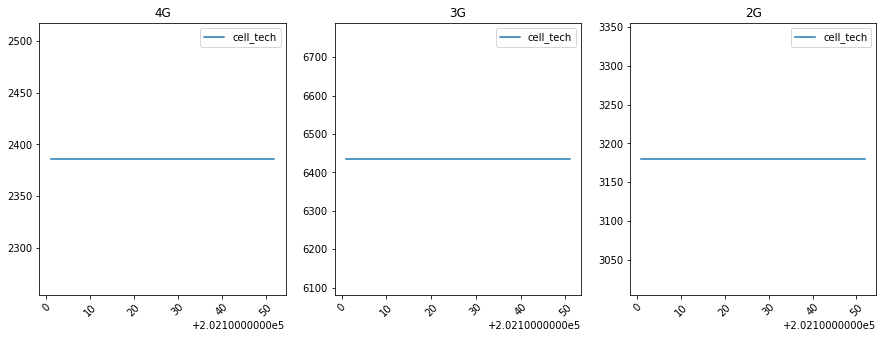

In [18]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
it =0

for tech in data['cell_tech'].unique():
    ax = axs[it]
    ax.set_title(tech)
    df = data[data['cell_tech'] == tech]
    df.groupby('date').count()[['cell_tech']].plot(ax=ax)
    it+=1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    xaxis = ax.axes.get_xaxis()
    xaxis.set_label_text('')

## Number or records per band through time

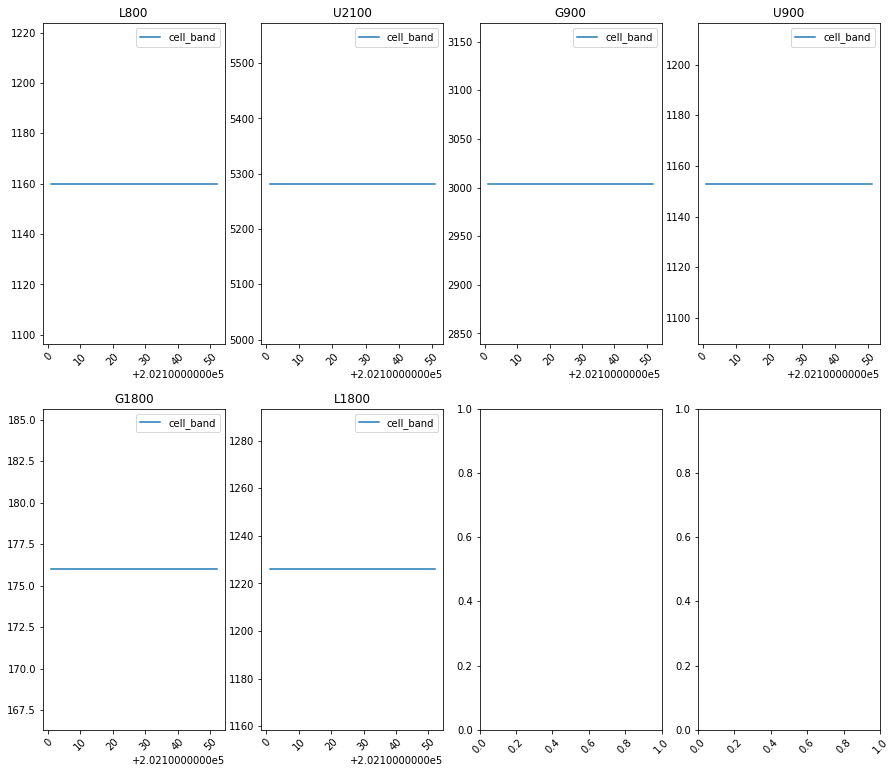

In [19]:
fig, axs = plt.subplots(2,4,figsize=(15,13))
t = [(i,j) for i in range(2) for j in range (4)]
it =0
for band in data['cell_band'].unique():
    ax = axs[t[it][0],t[it][1]]
    ax.set_title(band)
    df = data[data['cell_band'] == band]
    df.groupby('date').count()[['cell_band']].plot(ax=ax)
    it+=1
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    xaxis = ax.axes.get_xaxis()
    xaxis.set_label_text('')